##  Applied Machine Learning - Decision trees and machine learning fundamentals 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Introducing the data set
 
For this  we'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

##  Exploratory data analysis

>Read in the data CSV and storing as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [8]:
spotify_df=pd.read_csv("spotify_data.csv")

In [9]:
spotify_df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [10]:
#del spotify_df["Unnamed: 0"]

In [11]:
spotify_df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [12]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=123)

In [13]:
print('shape of df_train = ',df_train.shape)
print('shape of df_test = ',df_test.shape)

shape of df_train =  (1613, 17)
shape of df_test =  (404, 17)


- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> I will subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [14]:
df_test.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,404.000000,404.000000,404.000000,4.040000e+02,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,1013.091584,0.195429,0.625116,2.430777e+05,0.682698,0.119005,5.180693,0.197452,-6.976606,0.576733,0.098202,120.100047,3.982673,0.493735,0.497525
std,581.994964,0.262806,0.151955,8.514508e+04,0.205093,0.253872,3.757477,0.164284,3.438598,0.494690,0.097579,25.513886,0.258257,0.246747,0.500614
min,0.000000,0.000003,0.162000,1.658800e+04,0.035400,0.000000,0.000000,0.027300,-25.766000,0.000000,0.025200,73.946000,3.000000,0.034800,0.000000
25%,524.750000,0.010675,0.523750,1.999872e+05,0.554750,0.000000,1.000000,0.092300,-8.583250,0.000000,0.038750,99.986000,4.000000,0.295250,0.000000
50%,1021.000000,0.067650,0.635000,2.266735e+05,0.721500,0.000083,6.000000,0.122000,-6.255000,1.000000,0.054650,120.033500,4.000000,0.473000,0.000000
75%,1494.500000,0.274250,0.738500,2.594600e+05,0.848000,0.035375,9.000000,0.258250,-4.600750,1.000000,0.111250,135.833500,4.000000,0.693750,1.000000
max,2014.000000,0.992000,0.941000,1.004627e+06,0.998000,0.956000,11.000000,0.873000,-0.994000,1.000000,0.548000,200.749000,5.000000,0.967000,1.000000


In [15]:
get_range=pd.DataFrame(df_test.describe())
get_range


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,404.000000,404.000000,404.000000,4.040000e+02,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,1013.091584,0.195429,0.625116,2.430777e+05,0.682698,0.119005,5.180693,0.197452,-6.976606,0.576733,0.098202,120.100047,3.982673,0.493735,0.497525
std,581.994964,0.262806,0.151955,8.514508e+04,0.205093,0.253872,3.757477,0.164284,3.438598,0.494690,0.097579,25.513886,0.258257,0.246747,0.500614
min,0.000000,0.000003,0.162000,1.658800e+04,0.035400,0.000000,0.000000,0.027300,-25.766000,0.000000,0.025200,73.946000,3.000000,0.034800,0.000000
25%,524.750000,0.010675,0.523750,1.999872e+05,0.554750,0.000000,1.000000,0.092300,-8.583250,0.000000,0.038750,99.986000,4.000000,0.295250,0.000000
50%,1021.000000,0.067650,0.635000,2.266735e+05,0.721500,0.000083,6.000000,0.122000,-6.255000,1.000000,0.054650,120.033500,4.000000,0.473000,0.000000
75%,1494.500000,0.274250,0.738500,2.594600e+05,0.848000,0.035375,9.000000,0.258250,-4.600750,1.000000,0.111250,135.833500,4.000000,0.693750,1.000000
max,2014.000000,0.992000,0.941000,1.004627e+06,0.998000,0.956000,11.000000,0.873000,-0.994000,1.000000,0.548000,200.749000,5.000000,0.967000,1.000000


In [16]:
smallest_range=get_range.max()-get_range.min()
smallest_range

Unnamed: 0          2.014000e+03
acousticness        4.040000e+02
danceability        4.038480e+02
duration_ms         1.004223e+06
energy              4.039646e+02
instrumentalness    4.040000e+02
key                 4.040000e+02
liveness            4.039727e+02
loudness            4.297660e+02
mode                4.040000e+02
speechiness         4.039748e+02
tempo               3.784861e+02
time_signature      4.037417e+02
valence             4.039652e+02
target              4.040000e+02
dtype: float64

In [17]:
smallest_range_min=smallest_range.min()
smallest_range_min

378.48611370282106

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [18]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

<AxesSubplot: xlabel='danceability', ylabel='Count'>

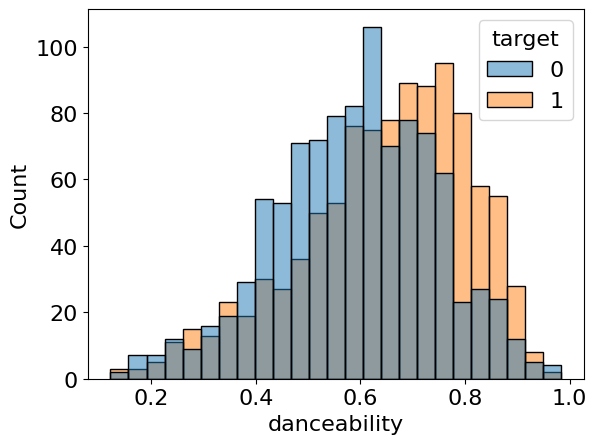

In [19]:

sns.histplot(data=spotify_df, x="danceability",hue="target")

<AxesSubplot: xlabel='tempo', ylabel='Count'>

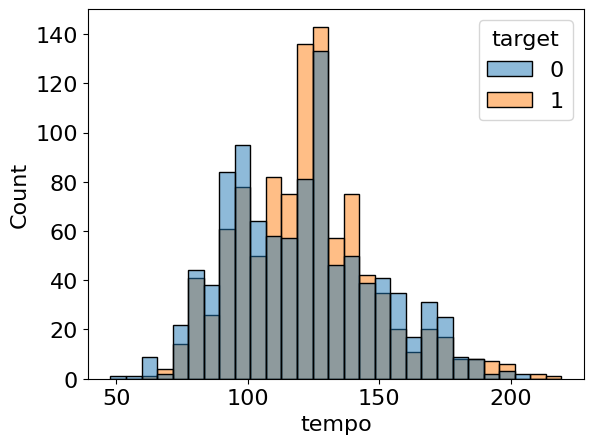

In [20]:
sns.histplot(data=spotify_df, x="tempo",hue="target")

<AxesSubplot: xlabel='energy', ylabel='Density'>

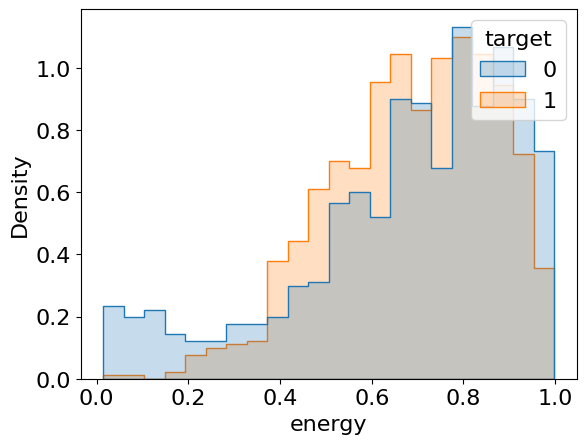

In [21]:
sns.histplot(data=spotify_df, x="energy",hue="target",element="step",stat="density")

<AxesSubplot: xlabel='valence', ylabel='Count'>

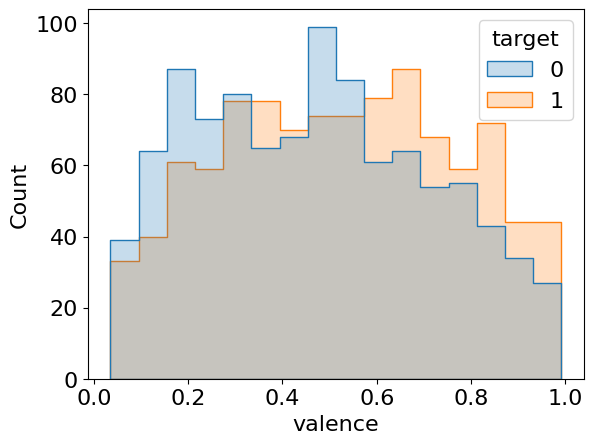

In [22]:
sns.histplot(data=spotify_df, x="valence",hue="target",element="step",)

Let's say i had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

In [21]:
# X =spotify_df.drop(columns=["target"])
# y = spotify_df["target"]


# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.1, random_state=123
# )

In [23]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(max_depth=1) # Create a decision tree
# model.fit(X_train,y_train) # Fit a decision tree
# model.score(X_train,y_train) 

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [23]:
text_labeled=df_train[["song_title", "artist"]].head()
text_labeled

,song_title,artist
1505,Cool for the Summer,Demi Lovato
813,Damn Son Where'd You Find This? (feat. Kelly H...,Markus Maximus
615,Trill Hoe,Western Tink
319,Who Is He (And What Is He to You?),Bill Withers
320,Acamar,Frankey


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

Yes.
If you have a lot of people in a service providing on-line music, and 
you record what kind of music people listen, you can cluster those people in clusters based on their selections

## Using sklearn to build a decision tree classifier

- Creating `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fitting a `DecisionTreeClassifier` on the train set.

In [25]:
df_train

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1505,1505,0.004770,0.585,214740,0.614,0.000155,10,0.0762,-5.594,0,0.0370,114.059,4.0,0.2730,0,Cool for the Summer,Demi Lovato
813,813,0.114000,0.665,216728,0.513,0.303000,0,0.1220,-7.314,1,0.3310,100.344,3.0,0.0373,1,Damn Son Where'd You Find This? (feat. Kelly H...,Markus Maximus
615,615,0.030200,0.798,216585,0.481,0.000000,7,0.1280,-10.488,1,0.3140,127.136,4.0,0.6400,1,Trill Hoe,Western Tink
319,319,0.106000,0.912,194040,0.317,0.000208,6,0.0723,-12.719,0,0.0378,99.346,4.0,0.9490,1,Who Is He (And What Is He to You?),Bill Withers
320,320,0.021100,0.697,236456,0.905,0.893000,6,0.1190,-7.787,0,0.0339,119.977,4.0,0.3110,1,Acamar,Frankey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.001060,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.2110,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
1346,1346,0.000021,0.535,203500,0.974,0.000149,10,0.2630,-3.566,0,0.1720,116.956,4.0,0.4310,0,Flag of the Beast,Emmure
1406,1406,0.503000,0.410,256333,0.648,0.000000,7,0.2190,-4.469,1,0.0362,60.391,4.0,0.3420,0,Don't You Cry For Me,Cobi
1389,1389,0.705000,0.894,222307,0.161,0.003300,4,0.3120,-14.311,1,0.0880,104.968,4.0,0.8180,0,장가갈 수 있을까 Can I Get Married?,Coffeeboy


In [26]:
df_train_int=df_train.drop(["song_title", "artist"],axis=1)

In [27]:
X=df_train_int.drop("target",axis=1)
y=df_train_int["target"]



print('shape of x= ',X.shape)
print('shape of y= ',y.shape)

shape of x=  (1613, 14)
shape of y=  (1613,)


In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=51)

print('shape of X_train = ',X_train.shape)
print('shape of y_train = ',y_train.shape)
print('shape of x_test = ',X_test.shape)
print('shape of y_test = ',y_test.shape)

shape of X_train =  (1290, 14)
shape of y_train =  (1290,)
shape of x_test =  (323, 14)
shape of y_test =  (323,)


In [29]:
#pip install -U scikit-learn

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [32]:
model=DecisionTreeClassifier() 
model.fit(X_train, y_train) 
model.score(X_train, y_train) 

1.0

Using the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [33]:

model.predict(X_train.iloc[[0]])

array([1], dtype=int64)

>Using the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 ,random_state=42)
model = DecisionTreeClassifier(max_depth=10)
train_scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(train_scores)

,fit_time,score_time,test_score,train_score
0,0.170494,0.030455,1.0,1.0
1,0.014199,0.006629,1.0,1.0
2,0.017819,0.012228,1.0,1.0
3,0.008657,0.009510,1.0,1.0
4,0.017758,0.004518,1.0,1.0
5,0.003535,0.005712,1.0,1.0
6,0.009995,0.000000,1.0,1.0
7,0.000000,0.000000,1.0,1.0
8,0.001052,0.000000,1.0,1.0
9,0.009738,0.000000,1.0,1.0


The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [32]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    train_scores = cross_validate(model, X_train, y_train, **kwargs)
    
    # return value for mean and std :
    mean_scores = pd.DataFrame(train_scores).mean()
    std_scores = pd.DataFrame(train_scores).std()
    out_col = []
    
    #for loop 1 by 1 10 fold validation
    for i in range(len(mean_scores)):
        out_col.append((f"%0.2f (+/- %0.2f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)


In [33]:
results = {}

results["Decision tree"] = mean_std_cross_val_scores(model, X_train, y_train, return_train_score=True)

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Decision tree,0.01 (+/- 0.00),0.00 (+/- 0.00),1.00 (+/- 0.00),1.00 (+/- 0.00)


>Do you see a significant difference between the training score and the cross-validation score?<

In [34]:
model = DecisionTreeClassifier()
cv_scores = cross_val_score(model, X_train, y_train)
cv_scores

array([1., 1., 1., 1., 1.])

In [ ]:
print(f"Average cross-validation score = {np.mean(cv_scores):.2f}")
print(f"Standard deviation of cross-validation score = {np.std(cv_scores):.2f}")

>There is no significant difference between the training score and the cross-validation score

>Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

In [35]:
model = DecisionTreeClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
cv_scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
print(f"Average cross-validation score = {np.mean(cv_scores):.2f}")
print(f"Standard deviation of cross-validation score = {np.std(cv_scores):.2f}")

Average cross-validation score = 1.00
Standard deviation of cross-validation score = 0.00


In [38]:
# pd.DataFrame(pd.DataFrame(results).mean())

## Hyperparameters 

In this we'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?


In [39]:
depth = 1
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
model.score(X_train, y_train)
print("Error:   %0.3f" % (1 - model.score(X_train, y_train)))


Error:   0.000


In [40]:
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.007510,0.008021,1.0,1.0
1,0.007977,0.001130,1.0,1.0
2,0.003060,0.006569,1.0,1.0
3,0.009769,0.005006,1.0,1.0
4,0.000000,0.008006,1.0,1.0
5,0.010177,0.001585,1.0,1.0
6,0.000000,0.000000,1.0,1.0
7,0.005449,0.000000,1.0,1.0
8,0.006418,0.000000,1.0,1.0
9,0.009073,0.001050,1.0,1.0


## Test set


Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Select max_depth
max_depth = 3

# Train a decision tree classifier on the entire training set
clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
clf.fit(X_train, y_train)

# Compute test score
y_pred = clf.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print("Test score:", test_score)

# Compare with cross-validation score
# ...


Test score: 1.0


## Conceptual questions

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

In [42]:
raw_data_3 = {
        'X1': [5,4,2,10,9,9],
        'X2': [2,3,2,10,-1,9],
         "Y" : [-1,-1,1,1,1,1]}
data=pd.DataFrame(raw_data_3,columns=['X1','X2',"Y"])
data

X=data.drop("Y",axis=1)
y=data["Y"]


print('shape of x= ',X.shape)
print('shape of y= ',y.shape)




shape of x=  (6, 2)
shape of y=  (6,)


In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=51)

print('shape of X_train = ',X_train.shape)
print('shape of y_train = ',y_train.shape)
print('shape of x_test = ',X_test.shape)
print('shape of y_test = ',y_test.shape)

shape of X_train =  (4, 2)
shape of y_train =  (4,)
shape of x_test =  (2, 2)
shape of y_test =  (2,)


In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier_data = KNeighborsClassifier(n_neighbors=3)
classifier_data.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
classifier_data.score(X_test,y_test)

0.0

In [46]:
new_X=  ([0,0],[0,0])
new_x= np.array(new_X)
new_X

([0, 0], [0, 0])

In [47]:
classifier_data.predict(new_X)

C:\Users\vasup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([-1, -1], dtype=int64)